In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt # to draw graphs
import seaborn as sns
%matplotlib inline

In [7]:
df = pd.read_csv('/content/drive/MyDrive/AI와무역투자론/Data/BostonHousing.csv')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,0
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,0
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,0
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,0


## predicator(feature)와 target(label) 정의

In [10]:
# predicators & target
features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT']
label = ['MEDV']

## 학습용 데이터와 테스트용 데이터 분리

In [12]:
from sklearn.model_selection import train_test_split
# Split Data for Logistic Regression
X_train, X_test, y_train, y_test = train_test_split(df[features], df[label], test_size=0.20, random_state=365)
X_train
#y_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
175,0.06664,0.0,4.05,0,0.510,6.546,33.1,3.1323,5,296,16.6,390.96,5.33
151,1.49632,0.0,19.58,0,0.871,5.404,100.0,1.5916,5,403,14.7,341.60,13.28
171,2.31390,0.0,19.58,0,0.605,5.880,97.3,2.3887,5,403,14.7,348.13,12.03
53,0.04981,21.0,5.64,0,0.439,5.998,21.4,6.8147,4,243,16.8,396.90,8.43
471,4.03841,0.0,18.10,0,0.532,6.229,90.7,3.0993,24,666,20.2,395.33,12.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,7.36711,0.0,18.10,0,0.679,6.193,78.1,1.9356,24,666,20.2,96.73,21.52
347,0.01870,85.0,4.15,0,0.429,6.516,27.7,8.5353,4,351,17.9,392.43,6.36
289,0.04297,52.5,5.32,0,0.405,6.565,22.9,7.3172,6,293,16.6,371.72,9.51
180,0.06588,0.0,2.46,0,0.488,7.765,83.3,2.7410,3,193,17.8,395.56,7.56


## Lasso, Ridge, ElasticNet Regression 호출

In [15]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet
Lasso_model = Lasso()
Ridge_model = Ridge()
ElasticNet_model = ElasticNet()

#logistic_model = LogisticRegression(penalty='l1', solver='liblinear', C=2)


## Lasso, Ridge, ElasticNet 모형을 데이터셋(X_train)에 적합(Fitting)

In [17]:
fitted_model_lasso = Lasso_model.fit(X_train, y_train)
fitted_model_ridge = Ridge_model.fit(X_train, y_train)
fitted_model_elastic = ElasticNet_model.fit(X_train, y_train)

### fitting 된 모델에서 산출된 Weight 산출

In [24]:
df_colnm_la = pd.DataFrame(fitted_model_lasso.feature_names_in_, columns=['feature'])
df_coef_la = pd.DataFrame(fitted_model_lasso.coef_.T, columns=['Lasso_Weight'])

df_coef_rid = pd.DataFrame(fitted_model_ridge.coef_.T, columns=['Ridge_Weight'])

df_coef_ela= pd.DataFrame(fitted_model_elastic.coef_.T, columns=['Elastic_Weight'])


pd.concat([df_colnm_la, df_coef_la, df_coef_ela ,df_coef_rid], axis=1)

,feature,Lasso_Weight,Elastic_Weight,Ridge_Weight
0,CRIM,-0.081301,-0.097011,-0.122490
1,ZN,0.040069,0.043073,0.039093
2,INDUS,-0.000000,-0.000000,-0.002998
3,CHAS,0.000000,0.000000,2.917490
4,NOX,-0.000000,-0.000000,-9.116477
5,RM,0.448712,0.782226,3.757435
6,AGE,0.020559,0.018541,-0.007765
7,DIS,-0.704822,-0.765992,-1.279352
8,RAD,0.267464,0.297934,0.285353
9,TAX,-0.016403,-0.017549,-0.013946


## 학습된 모델(Fitted Model)을 이용하여 새로운 데이터(Test Data)에 대해 예측

In [25]:
X_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
152,1.12658,0.0,19.58,1,0.871,5.012,88.0,1.6102,5,403,14.7,343.28,12.12
482,5.73116,0.0,18.10,0,0.532,7.061,77.0,3.4106,24,666,20.2,395.28,7.01
232,0.57529,0.0,6.20,0,0.507,8.337,73.3,3.8384,8,307,17.4,385.91,2.47
225,0.52693,0.0,6.20,0,0.504,8.725,83.0,2.8944,8,307,17.4,382.00,4.63
189,0.08370,45.0,3.44,0,0.437,7.185,38.9,4.5667,5,398,15.2,396.90,5.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,0.63796,0.0,8.14,0,0.538,6.096,84.5,4.4619,4,307,21.0,380.02,10.26
249,0.19073,22.0,5.86,0,0.431,6.718,17.5,7.8265,7,330,19.1,393.74,6.56
12,0.09378,12.5,7.87,0,0.524,5.889,39.0,5.4509,5,311,15.2,390.50,15.71
235,0.33045,0.0,6.20,0,0.507,6.086,61.5,3.6519,8,307,17.4,376.75,10.88


## feature값을 기반으로 집값(MEDV)을 예측

In [30]:
predicted_value_lasso = fitted_model_lasso.predict(X_test)
predicted_value_ridge = fitted_model_ridge.predict(X_test)
predicted_value_elastic = fitted_model_elastic.predict(X_test)

In [32]:
lasso_pred_value = pd.DataFrame(predicted_value_lasso, columns=['lasso_predicted_value'])
ridge_pred_value = pd.DataFrame(predicted_value_ridge, columns=['ridge_predicted_value'])
elastic_pred_value = pd.DataFrame(predicted_value_elastic, columns=['elastic_predicted_value'])

real_value = y_test.reset_index()

rslt=pd.concat([real_value, lasso_pred_value, ridge_pred_value, elastic_pred_value],axis=1)
rslt

,index,MEDV,lasso_predicted_value,ridge_predicted_value,elastic_predicted_value
0,152,15.3,25.837140,22.360974,25.358426
1,482,25.0,25.366059,27.183210,25.592689
2,232,41.7,33.263357,37.612545,33.790619
3,225,50.0,32.641997,39.101816,33.386443
4,189,34.9,30.711477,33.594877,30.900970
...,...,...,...,...,...
97,14,18.2,22.089232,19.528156,21.865176
98,249,26.2,24.401529,24.269040,24.372510
99,12,21.7,21.754334,21.413760,21.698561
100,235,24.0,25.718416,25.150124,25.727176


## 모델별 예측값과 실제값(MEDV) 그래프

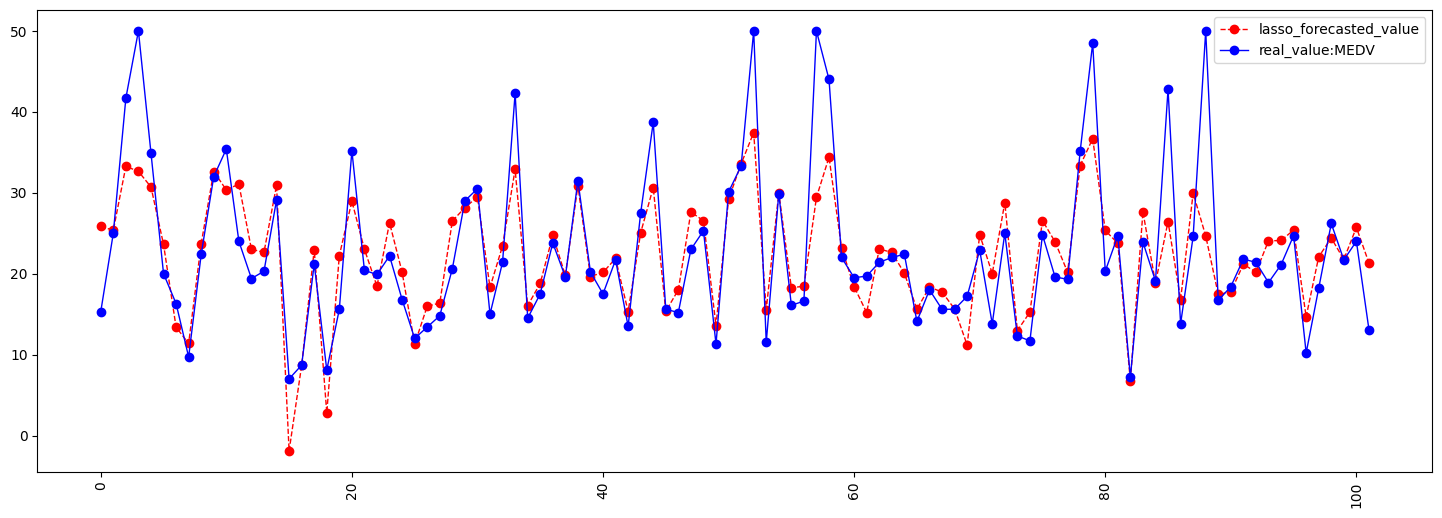

In [77]:
plt.figure(figsize=(18,6))

# 예측값 Plot
plt.plot(rslt['lasso_predicted_value'], marker='o',markersize=6,color='red', linestyle='dashed', linewidth=1,label='lasso_forecasted_value')
#plt.plot(rslt['ridge_predicted_value'], marker='o',markersize=6,color='gray', linestyle='dashed', linewidth=1, label='ridge_forecasted_value')
#plt.plot(rslt['elastic_predicted_value'], marker='o',markersize=6,color='black', linestyle='dashed', linewidth=1, label='elastic_forecasted_value')


# 예측된 결과값 Plot
plt.plot(rslt['MEDV'], marker='o',markersize=6,color='blue',linewidth=1,label='real_value:MEDV' )

plt.legend()
plt.xticks(rotation=90)
plt.show()

In [87]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, mean_absolute_percentage_error
print("LASSO_MAE  :",mean_absolute_error(predicted_value_lasso, y_test))
print("Ridge_MAE  :",mean_absolute_error(predicted_value_ridge, y_test))
print("Elastic_MAE:",mean_absolute_error(predicted_value_elastic, y_test))
print("================================")
print("LASSO_MAPE  :",mean_absolute_percentage_error(predicted_value_lasso, y_test))
print("Ridge_MAPE  :",mean_absolute_percentage_error(predicted_value_ridge, y_test))
print("Elastic_MAPE:",mean_absolute_percentage_error(predicted_value_elastic, y_test))
print("================================")
print("LASSO_RMSE  :",mean_squared_error(predicted_value_lasso, y_test)**0.5)
print("Ridge_RMSE  :",mean_squared_error(predicted_value_ridge, y_test)**0.5)
print("Elastic_RMSE:",mean_squared_error(predicted_value_elastic, y_test)**0.5)


LASSO_MAE  : 3.657601508036823
Ridge_MAE  : 3.0885050576976876
Elastic_MAE: 3.5865828405442097
LASSO_MAPE  : 0.21208278598607008
Ridge_MAPE  : 0.17340275307324093
Elastic_MAPE: 0.2055752014229413
LASSO_RMSE  : 5.664016434306641
Ridge_RMSE  : 4.955587376767678
Elastic_RMSE: 5.551461165184449
